In [12]:
# Name: Suman Raman Poudel
# Course: MSCS 634 - Machine Learning
# Lab Assignment: Lab 2 - KNN and RNN Classifiers with Wine Dataset

In [1]:
import sys
import subprocess
import pkg_resources

# List of required packages
required = {'scikit-learn', 'pandas==2.2.2', 'matplotlib', 'jupyter'}
missing = required - {pkg.key + '==' + pkg.version if pkg.version else pkg.key for pkg in pkg_resources.working_set}

# Install missing packages
if missing:
    print(f"Installing missing packages: {missing}")
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', *missing])

# Verify installations
try:
    import sklearn
    import pandas
    import matplotlib
    print("All libraries installed successfully:")
    print(f"scikit-learn version: {sklearn.__version__}")
    print(f"pandas version: {pandas.__version__}")
    print(f"matplotlib version: {matplotlib.__version__}")
except ImportError as e:
    print(f"Error: {e}. Please rerun the installation or check your environment.")

/var/folders/_h/06w9zs9s30q8r46v508kxqzm0000gn/T/ipykernel_12330/1818515057.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Installing missing packages: {'scikit-learn', 'matplotlib', 'pandas==2.2.2', 'jupyter'}
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 10.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.3.1
    Uninstalling pandas-2.3.1:
      Successfully uninstalled pandas-2.3.1



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


All libraries installed successfully:
scikit-learn version: 1.7.1
pandas version: 2.2.2
matplotlib version: 3.10.3


In [2]:
# Step 1: Load necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Step 2: Load and Prepare the Dataset
# Load the Wine Dataset
wine = load_wine()
X = wine.data
y = wine.target

# Scale the features (improves KNN and RNN performance)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Data Exploration
print("Feature Names:", wine.feature_names)
print("Target Classes:", wine.target_names)
print("Dataset Shape:", X.shape)
print("Class Distribution:", pd.Series(y).value_counts())

Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Classes: ['class_0' 'class_1' 'class_2']
Dataset Shape: (178, 13)
Class Distribution: 1    71
0    59
2    48
Name: count, dtype: int64


In [4]:
# Step 3: Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Step 4: Implement K-Nearest Neighbors (KNN)
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    # Initialize and train KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies.append(accuracy)
    print(f"KNN Accuracy for k={k}: {accuracy:.4f}")

KNN Accuracy for k=1: 0.9444
KNN Accuracy for k=5: 0.9444
KNN Accuracy for k=11: 0.9444
KNN Accuracy for k=15: 0.9722
KNN Accuracy for k=21: 0.9444


In [7]:
# Step 5: Implement Radius Neighbors (RNN)
radius_values = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
rnn_accuracies = []

for r in radius_values:
    try:
        # Initialize and train RNN model with outlier handling
        rnn = RadiusNeighborsClassifier(radius=r, outlier_label="most_frequent")
        rnn.fit(X_train, y_train)
        
        # Predict and calculate accuracy
        y_pred = rnn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        rnn_accuracies.append(accuracy)
        print(f"RNN Accuracy for radius={r}: {accuracy:.4f}")
    except ValueError as e:
        print(f"RNN Error for radius={r}: {e}")
        rnn_accuracies.append(0.0)  # Assign 0 accuracy for failed radius

RNN Accuracy for radius=1.0: 0.3889
RNN Accuracy for radius=1.5: 0.6389
RNN Accuracy for radius=2.0: 0.8889
RNN Accuracy for radius=2.5: 0.9722
RNN Accuracy for radius=3.0: 0.9444
RNN Accuracy for radius=3.5: 1.0000


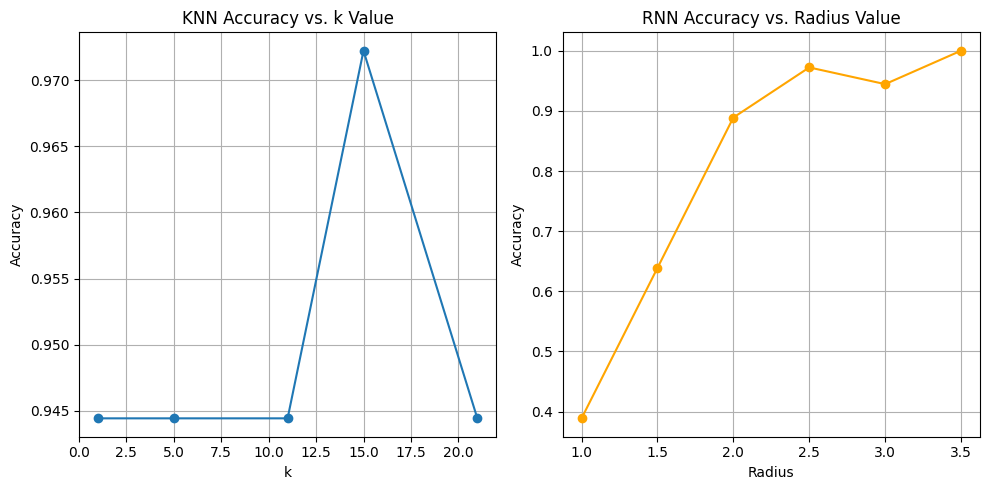

In [8]:
# Step 6: Visualize and Compare Results
# Plot KNN accuracy trend
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('KNN Accuracy vs. k Value')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot RNN accuracy trend
plt.subplot(1, 2, 2)
plt.plot(radius_values, rnn_accuracies, marker='o', color='orange')
plt.title('RNN Accuracy vs. Radius Value')
plt.xlabel('Radius')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

In [10]:
# Step 7: Compare and Discuss Results
print("\nPerformance Comparison:")
print("KNN Accuracies:", {k: acc for k, acc in zip(k_values, knn_accuracies)})
print("RNN Accuracies:", {r: acc for r, acc in zip(radius_values, rnn_accuracies)})


Performance Comparison:
KNN Accuracies: {1: 0.9444444444444444, 5: 0.9444444444444444, 11: 0.9444444444444444, 15: 0.9722222222222222, 21: 0.9444444444444444}
RNN Accuracies: {1.0: 0.3888888888888889, 1.5: 0.6388888888888888, 2.0: 0.8888888888888888, 2.5: 0.9722222222222222, 3.0: 0.9444444444444444, 3.5: 1.0}


In [11]:
# Identify best performing parameters
best_k = k_values[np.argmax(knn_accuracies)]
best_k_accuracy = max(knn_accuracies)

best_r = radius_values[np.argmax(rnn_accuracies)]
best_r_accuracy = max(rnn_accuracies)

print("\n=== Best Performing Parameters ===")
print(f"Best KNN Accuracy: {best_k_accuracy:.4f} at k = {best_k}")
print(f"Best RNN Accuracy: {best_r_accuracy:.4f} at radius = {best_r}")

# Analysis and Recommendation
print("\n=== Observations and Recommendations ===")
if best_k_accuracy > best_r_accuracy:
    print(f"KNN performed better overall with a peak accuracy of {best_k_accuracy:.4f}.")
    print("KNN is preferable when stable performance is needed with minimal parameter tuning.")
else:
    print(f"RNN performed better overall with a peak accuracy of {best_r_accuracy:.4f}.")
    print("RNN is preferable when high accuracy is critical, but parameter tuning is required to find the optimal radius.")

print("\nSummary:")
print("- Use **KNN** when consistent performance is desired across different neighbor counts.")
print("- Use **RNN** when tuning the radius is feasible and higher accuracy is prioritized, as RNN may outperform KNN when optimally tuned.")


=== Best Performing Parameters ===
Best KNN Accuracy: 0.9722 at k = 15
Best RNN Accuracy: 1.0000 at radius = 3.5

=== Observations and Recommendations ===
RNN performed better overall with a peak accuracy of 1.0000.
RNN is preferable when high accuracy is critical, but parameter tuning is required to find the optimal radius.

Summary:
- Use **KNN** when consistent performance is desired across different neighbor counts.
- Use **RNN** when tuning the radius is feasible and higher accuracy is prioritized, as RNN may outperform KNN when optimally tuned.
